# dicover data


In [131]:
import numpy as np
import os
import pandas as pd
import cv2 as cv
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from PIL import Image


In [12]:
def load_image(path):
    for img in os.listdir(data_path):
        print("image name=",img)
        #to list all the files present inside that directory.
        image=cv.imread(os.path.join(data_path,img)) 
        # Break- is necessary here, so that only the first image is accessed,           otherwise the function will loop through all the images present inside the Bacteria folder.
        break

    return image
    

# display an Image

image name= IM-0335-0001.jpeg
The dimensions are 1897 pixels height and 2538 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 99.2904
The standard deviation is 74.4558


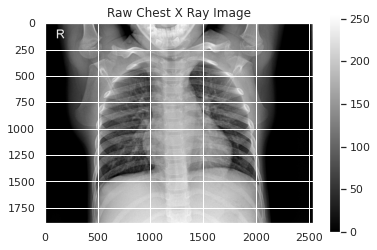

In [133]:
data_path = '/home/raneem/codefellows/401/demoes/datacleaning/covid_noura-dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
image = load_image(data_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")

In [134]:
input_path = '/home/raneem/codefellows/401/demoes/datacleaning/covid_noura-dataset/'

metadata = pd.read_csv('covid_noura-dataset/Chest_xray_Corona_Metadata.csv')

summary = pd.read_csv('covid_noura-dataset/Chest_xray_Corona_dataset_Summary.csv')

metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [135]:
summary.sample(5)

,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
5,5,Pnemonia,bacteria,NaN,2772
3,3,Pnemonia,Virus,COVID-19,58
2,2,Pnemonia,Virus,NaN,1493
6,6,Pnemonia,bacteria,Streptococcus,5
0,0,Normal,NaN,NaN,1576


In [136]:
train_df = metadata[metadata.Dataset_type == 'TRAIN'].reset_index(drop=True)
test_df = metadata[metadata.Dataset_type == 'TEST'].reset_index(drop=True)


assert train_df.shape[0] + test_df.shape[0] == metadata.shape[0]
# print(f'Train df shape: {train_df.shape}')
# print(f'Test df shape: {test_df.shape}')
print(f'Count of null values in train:\n{train_df.isnull().sum()}')
print("-"*50)
print(f'Count of null values in test:\n{test_df.isnull().sum()}')



Count of null values in train:
Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5217
Label_1_Virus_category    1342
dtype: int64
--------------------------------------------------
Count of null values in test:
Unnamed: 0                  0
X_ray_image_name            0
Label                       0
Dataset_type                0
Label_2_Virus_category    624
Label_1_Virus_category    234
dtype: int64


In [150]:
train_df = train_df.fillna('unknow')
test_df = test_df.fillna('unknow')


In [161]:
# bacteria_df = metadata[metadata.Label_1_Virus_category == 'bacteria'].fillna('streptococcus')

train_df[train_df.Label_1_Virus_category == 'bacteria'].fillna('streptococcus')


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,unknow,bacteria
1347,1347,person1018_bacteria_2949.jpeg,Pnemonia,TRAIN,unknow,bacteria
1348,1348,person1017_bacteria_2948.jpeg,Pnemonia,TRAIN,unknow,bacteria
1350,1350,person1016_bacteria_2947.jpeg,Pnemonia,TRAIN,unknow,bacteria
1353,1353,person1014_bacteria_2945.jpeg,Pnemonia,TRAIN,unknow,bacteria
...,...,...,...,...,...,...
5216,5216,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pnemonia,TRAIN,Streptococcus,bacteria
5217,5217,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pnemonia,TRAIN,Streptococcus,bacteria
5218,5218,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pnemonia,TRAIN,Streptococcus,bacteria
5219,5219,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pnemonia,TRAIN,Streptococcus,bacteria


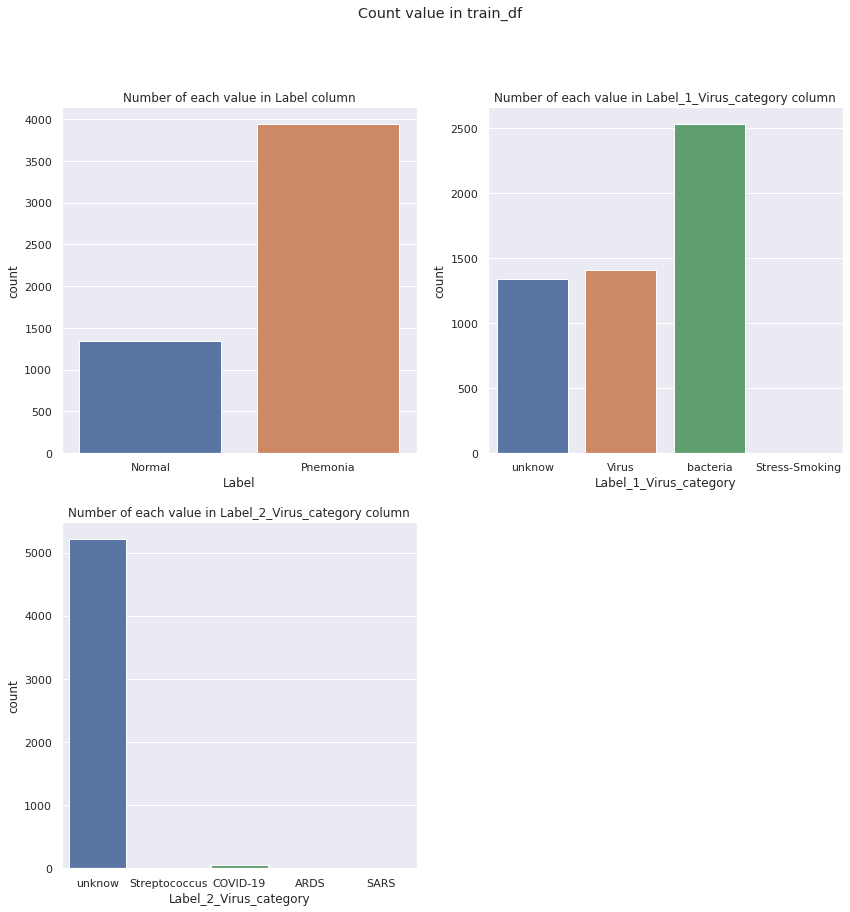

In [157]:
col = ['Label', 'Label_1_Virus_category', 'Label_2_Virus_category']
sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(14, 14))
for i in range(3):
    ax = plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=col[i], data=train_df)
    ax.set_title(f'Number of each value in {col[i]} column')
fig.suptitle('Count value in train_df')
plt.show()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
1347,1347,person1018_bacteria_2949.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
1348,1348,person1017_bacteria_2948.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
1350,1350,person1016_bacteria_2947.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
1353,1353,person1014_bacteria_2945.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
...,...,...,...,...,...,...
5859,5882,person173_bacteria_830.jpeg,Pnemonia,TEST,streptococcus,bacteria
5860,5883,person173_bacteria_829.jpeg,Pnemonia,TEST,streptococcus,bacteria
5861,5884,person172_bacteria_828.jpeg,Pnemonia,TEST,streptococcus,bacteria
5862,5885,person172_bacteria_827.jpeg,Pnemonia,TEST,streptococcus,bacteria


# AUGMENTED IMAGES

### libraries to import

In [164]:
# from keras.preprocessing.image import ImageDataGenerator
# from skimage import io
# from matplotlib import pyplot as plt

# import numpy as np
# import os
# from PIL import Image


# Befor you generate more than an image pay attention to : 
1- image size , you should generate images that are most similar to the original one 
use this code to check the sizes :
```
# image_5 = PIL.Image.open("try_augment/1-s2.0-S0140673620303706-fx1_lrg.jpg")
# width, height = image_5.size
# print(width, height)

```
2-pay attention to the photos number you want : in for loop using i each one will generate that number 
for example you have 5 images , i breaks at 3 this mean you gonna have 4*5=20 images 

tutorial : https://www.youtube.com/watch?v=ccdssX4rIh8&t=965s


In [ ]:
data_gen=ImageDataGenerator(
rotation_range=10,#random rotation
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',cval=1
)


#Manually read each image and create an array to be supplied to datagen via flow method
dataset = []

image_directory = 'try_augment'
SIZE = 128
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
        image = io.imread(image_directory +'/'+ image_name)
        
        image = Image.fromarray(image, 'RGB')
        image = image.resize((2563,1148))    #IMAGE SIZE 
        dataset.append(np.array(image))

x = np.array(dataset)

i = 0
for batch in data_gen.flow(x, batch_size=16,  
                          save_to_dir='augmented', 
                          save_prefix='aug', 
                          save_format='png'):
    i += 1
    if i > 2:
        break  # otherwise the generator would loop indefinitely  
